# EDA (Exploratory Data Analysis)

In [1]:
import pandas as pd # Importing pandas for data manipulation and analysis
import matplotlib.pyplot as plt # Importing matplotlib for plotting graphs
import seaborn as sns # Importing seaborn for making statistically informative plots
import numpy as np # Importing numpy for numerical operations
from scipy.stats import norm # Importing norm for statistical functions
from sklearn.preprocessing import StandardScaler # Importing StandardScaler for normalization
from scipy import stats # Importing stats for statistical functions
import warnings 
warnings.filterwarnings('ignore') # Ignoring warnings to clean up output
%matplotlib inline 
import gc # Importing garbage collector interface

import os
import string
color = sns.color_palette() # Setting a color palette for seaborn plots

%matplotlib inline

from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True) # Setting up plotly for interactive plotting in notebooks
import plotly.graph_objs as go # Importing graph objects for plotly for creating different types of plots

from sklearn import model_selection, preprocessing, metrics, ensemble, naive_bayes, linear_model
# Importing various machine learning tools from sklearn

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
# Importing tools for text vectorization

from sklearn.decomposition import TruncatedSVD # Importing SVD for dimensionality reduction
import lightgbm as lgb # Importing LightGBM for gradient boosting framework

pd.options.mode.chained_assignment = None # Option to ignore chained assignment warnings
pd.options.display.max_columns = 999 # Setting display options to show more columns

import nltk
nltk.download('vader_lexicon')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('popular')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/dipeshyadav/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/dipeshyadav/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/dipeshyadav/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dipeshyadav/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /Users/dipeshyadav/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /Users/dipeshyadav/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Download

True

In [2]:
df_train = pd.read_csv("drugsComTrain_raw.csv", parse_dates=["date"]) # Load the training data from CSV, parsing the 'date' column as datetime objects
df_test = pd.read_csv("drugsComTest_raw.csv", parse_dates=["date"]) # Load the test data from CSV, similarly parsing 'date' columns

print("Train shape :", df_train.shape) # Print the shape (number of rows and columns) of the training dataset
print("Test shape :", df_test.shape) # Print the shape of the test dataset

df_train.head() # Display the first few rows of the training dataset to provide a quick overview of the data

df_all = pd.concat([df_train, df_test]) # Concatenate the training and test datasets into a single dataframe


Train shape : (161297, 7)
Test shape : (53766, 7)


In [3]:
condition_dn = df_all.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False) # Group the data by 'condition' and count unique 'drugName' entries, then sort in descending order

condition_dn[0:20]

condition
Not Listed / Othe                             253
Pain                                          219
Birth Control                                 181
High Blood Pressure                           146
Acne                                          127
Depression                                    115
Rheumatoid Arthritis                          107
Diabetes, Type 2                               97
Allergic Rhinitis                              95
Insomnia                                       85
Osteoarthritis                                 84
Bipolar Disorde                                82
Anxiety                                        81
Abnormal Uterine Bleeding                      77
Endometriosis                                  64
3</span> users found this comment helpful.     62
Psoriasis                                      61
Migraine                                       60
ADHD                                           58
4</span> users found this comment helpfu

In [4]:
df_all[df_all['condition']=='3</span> users found this comment helpful.'].head(3)


uniqueID    drugName                                   condition  \
243      81588         Yaz  3</span> users found this comment helpful.   
1864    124318       Skyla  3</span> users found this comment helpful.   
3322    202848  ProAir HFA  3</span> users found this comment helpful.   

                                                 review  rating       date  \
243   "I took Yaz for a little over 2 years.  From a...       3 2010-06-01   
1864  "Never pregnant,28,retroverted small (6cm) ute...       1 2015-12-16   
3322  "I get chest colds and asthmatic symptoms in t...       9 2015-12-12   

      usefulCount  
243             3  
1864            3  
3322            3

In [5]:
condition_dn = df_all.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)  # Group by 'condition', count unique 'drugName', and sort in descending order

condition_dn[condition_dn.shape[0]-20:condition_dn.shape[0]]


condition
Autoimmune Hemolytic Anemia                    1
Microscopic polyangiitis                       1
Salmonella Gastroenteritis                     1
Meningitis, Meningococcal                      1
72</span> users found this comment helpful.    1
70</span> users found this comment helpful.    1
Scleroderma                                    1
Manscaping Pain                                1
64</span> users found this comment helpful.    1
Secondary Cutaneous Bacterial Infections       1
63</span> users found this comment helpful.    1
62</span> users found this comment helpful.    1
61</span> users found this comment helpful.    1
Sepsis                                         1
Bartonellosis                                  1
Short Stature                                  1
Short Stature for Age                          1
54</span> users found this comment helpful.    1
Lyme Disease, Erythema Chronicum Migrans       1
Intermittent Explosive Disorde                 1
Name: drug

In [6]:
df_train['review'][1]


'"My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective."'

In [7]:
df_train['review'][2]

'"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas."'

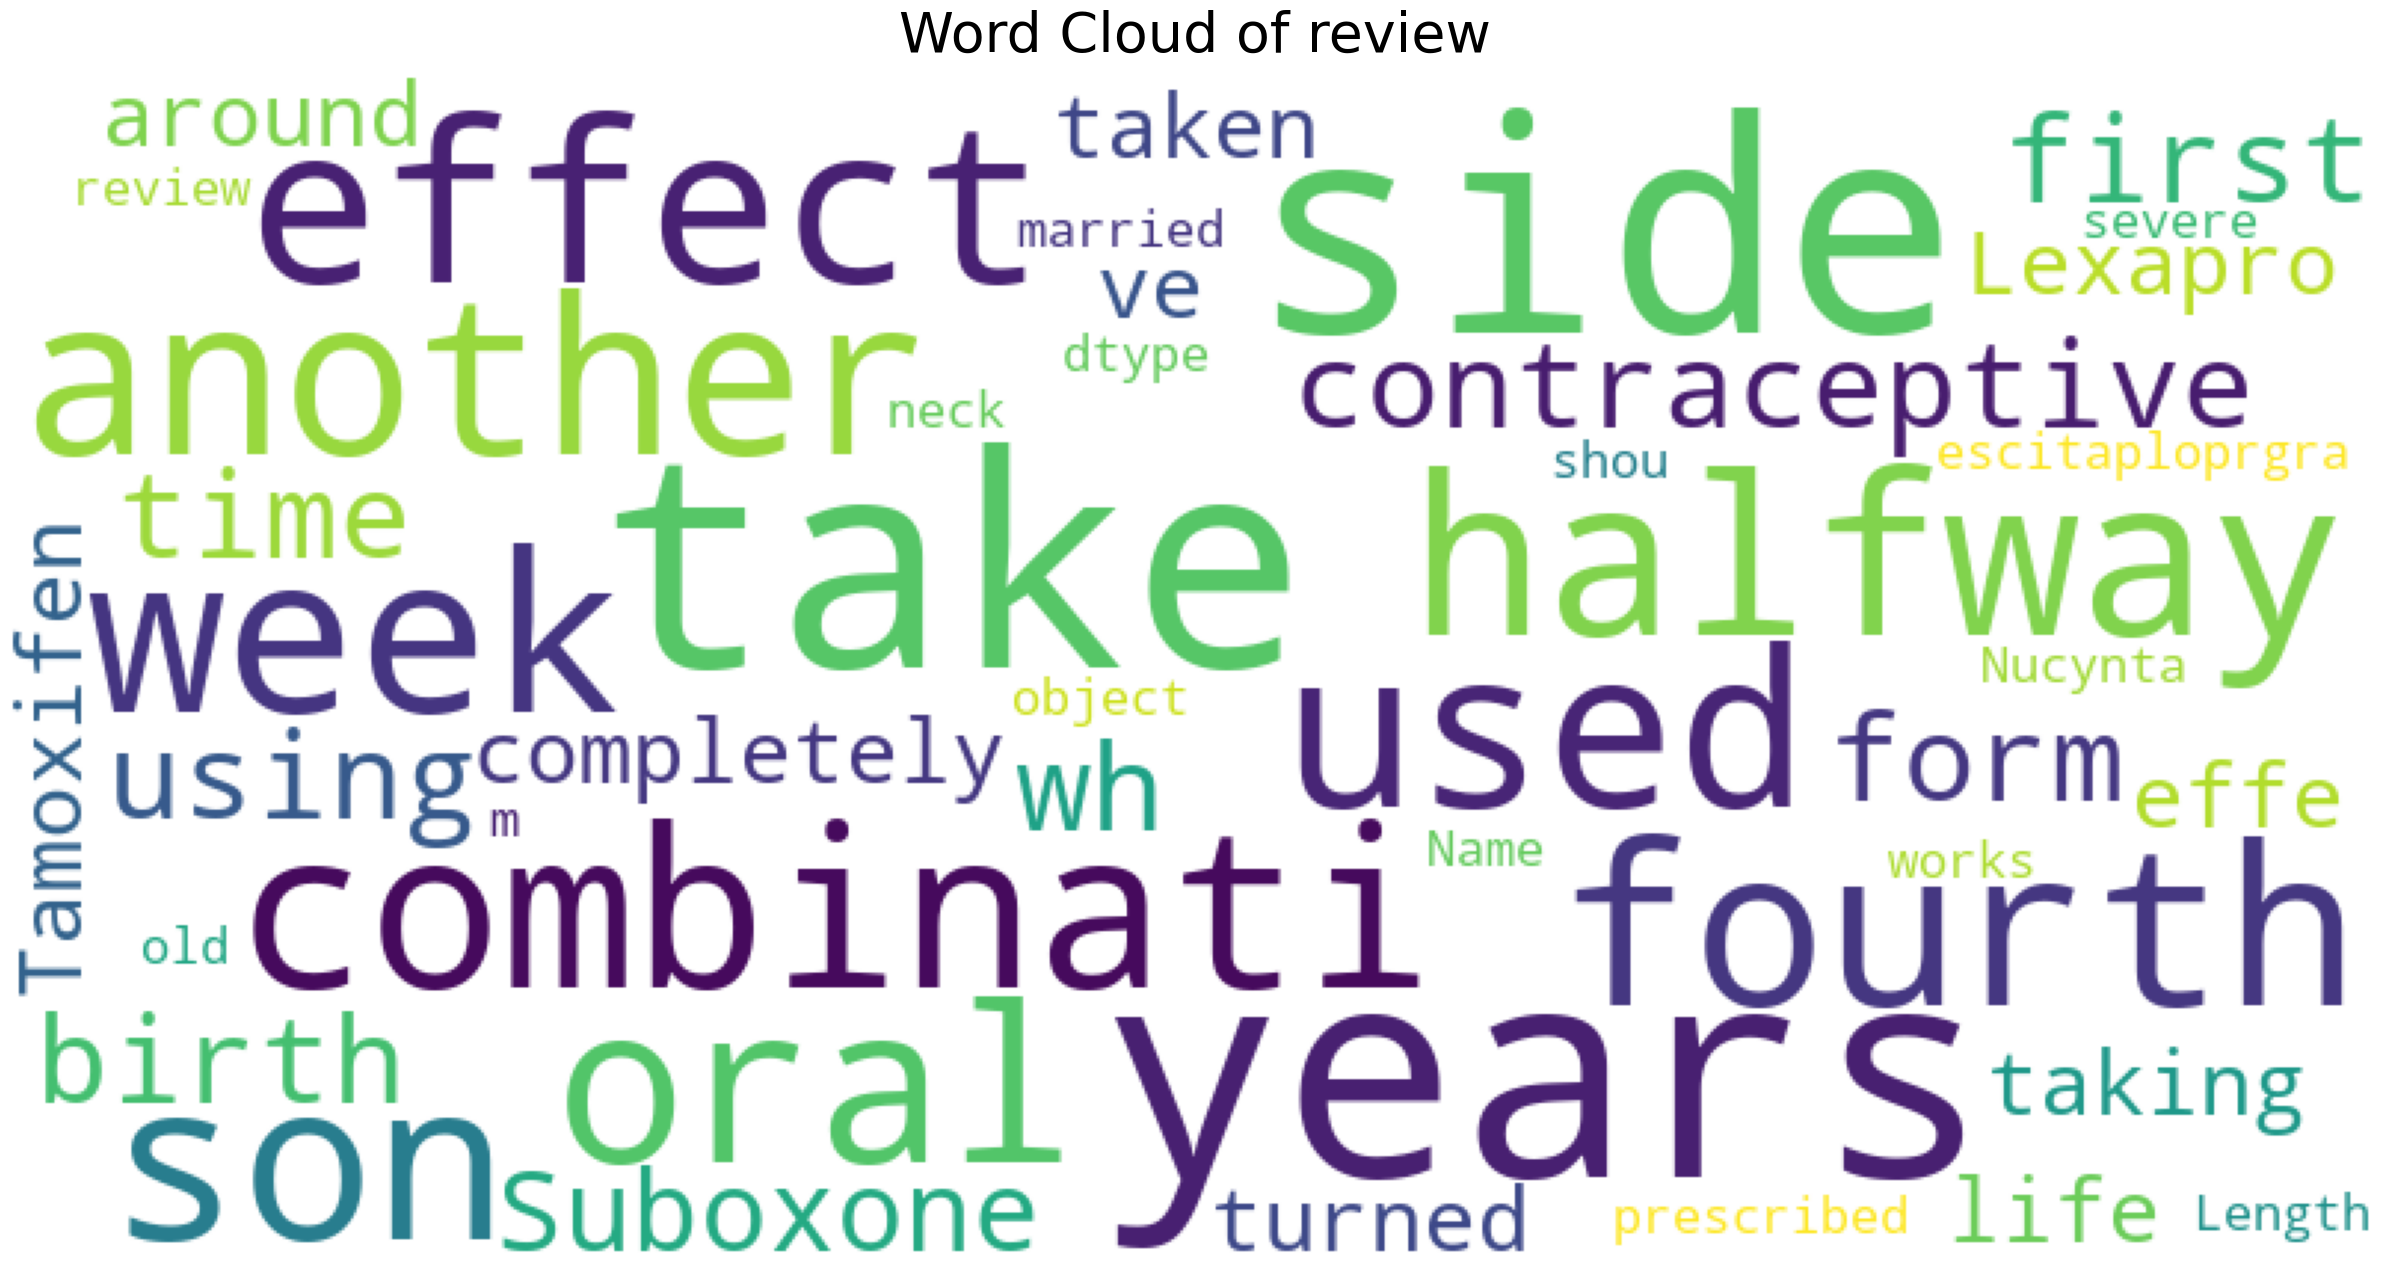

In [8]:
# Importing necessary libraries
from wordcloud import WordCloud, STOPWORDS

# Defining a function to plot word cloud
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    # Defining stopwords to filter out common words
    stopwords = set(STOPWORDS)
    # Adding more stopwords that are specific to the context
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    # Creating a WordCloud object with specified parameters
    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    # Generating word cloud from the provided text
    wordcloud.generate(str(text))
    
    # Plotting the word cloud
    plt.figure(figsize=figure_size)
    if image_color:
        # Generating word cloud with colors from the provided mask image
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        # Plotting word cloud without color alterations
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    # Turning off axis for better visualization
    plt.axis('off');
    # Ensuring tight layout
    plt.tight_layout()  

# Calling the function to plot word cloud of reviews
plot_wordcloud(df_all["review"], title="Word Cloud of review")


In [9]:
from collections import defaultdict  # Importing defaultdict from the collections module

df_all_6_10 = df_all[df_all["rating"] > 5]  # Creating a new DataFrame containing only entries with a rating greater than 5
df_all_1_5 = df_all[df_all["rating"] < 6]   # Creating another DataFrame containing only entries with a rating less than 6


In [10]:
## Custom function for generating n-grams ##
def generate_ngrams(text, n_gram=1):
    # Tokenize the text, convert to lowercase, and remove stopwords
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    # Generate n-grams by zipping together token sequences of length n
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    # Join the n-grams into strings and return
    return [" ".join(ngram) for ngram in ngrams]

## Custom function for creating a horizontal bar chart ##
def horizontal_bar_chart(df, color):
    # Create a bar chart trace
    trace = go.Bar(
        y=df["word"].values[::-1],  # Reverse the y-axis values
        x=df["wordcount"].values[::-1],  # Reverse the x-axis values
        showlegend=False,  # Do not show legend
        orientation='h',  # Horizontal orientation
        marker=dict(
            color=color,  # Set the color
        ),
    )
    return trace

## Get the bar chart for reviews with ratings 1 to 5 ##
freq_dict = defaultdict(int)
for sent in df_all_1_5["review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
# Convert the frequency dictionary to a DataFrame and sort by word count
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
# Create a horizontal bar chart trace for ratings 1 to 5
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

## Get the bar chart for reviews with ratings 6 to 10 ##
freq_dict = defaultdict(int)
for sent in df_all_6_10["review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
# Convert the frequency dictionary to a DataFrame and sort by word count
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
# Create a horizontal bar chart trace for ratings 6 to 10
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

# Create a subplot with two horizontal bar charts
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of ratings 1 to 5", 
                                          "Frequent words of ratings 6 to 10"])
# Add the traces to the subplot
fig.append_trace(trace0, 1, 1)  # Add trace0 to row 1, column 1
fig.append_trace(trace1, 1, 2)  # Add trace1 to row 1, column 2
# Update layout properties
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
# Plot the figure
py.iplot(fig, filename='word-plots')


/Users/dipeshyadav/anaconda3/lib/python3.11/site-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [11]:
# Create a defaultdict to store the frequency of bigrams
freq_dict = defaultdict(int)
# Iterate through each review in the dataframe with ratings 1 to 5
for sent in df_all_1_5["review"]:
    # Generate bigrams for each review
    for word in generate_ngrams(sent, 2):  # Using generate_ngrams with n_gram=2 for bigrams
        # Increment the frequency count for each bigram
        freq_dict[word] += 1
# Convert the frequency dictionary to a DataFrame and sort by word count
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
# Create a horizontal bar chart trace for bigrams of ratings 1 to 5
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'orange')

# Reset the frequency dictionary for bigrams of ratings 6 to 10
freq_dict = defaultdict(int)
# Iterate through each review in the dataframe with ratings 6 to 10
for sent in df_all_6_10["review"]:
    # Generate bigrams for each review
    for word in generate_ngrams(sent, 2):  # Using generate_ngrams with n_gram=2 for bigrams
        # Increment the frequency count for each bigram
        freq_dict[word] += 1
# Convert the frequency dictionary to a DataFrame and sort by word count
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
# Create a horizontal bar chart trace for bigrams of ratings 6 to 10
trace2 = horizontal_bar_chart(fd_sorted.head(50), 'orange')

# Create a subplot with two horizontal bar charts for bigrams
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04, horizontal_spacing=0.15,
                          subplot_titles=["Frequent bigrams of rating 1 to 5", 
                                          "Frequent bigrams of rating 6 to 10"])
# Add the traces to the subplot
fig.append_trace(trace1, 1, 1)  # Add trace1 to row 1, column 1
fig.append_trace(trace2, 1, 2)  # Add trace2 to row 1, column 2
# Update layout properties
fig['layout'].update(height=1200, width=1000, paper_bgcolor='rgb(233,233,233)', title="Bigram Count Plots")
# Plot the figure
py.iplot(fig, filename='word-plots')


/Users/dipeshyadav/anaconda3/lib/python3.11/site-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [12]:
# Create a defaultdict to store the frequency of trigrams
freq_dict = defaultdict(int)
# Iterate through each review in the dataframe with ratings 1 to 5
for sent in df_all_1_5["review"]:
    # Generate trigrams for each review
    for word in generate_ngrams(sent, 3):  # Using generate_ngrams with n_gram=3 for trigrams
        # Increment the frequency count for each trigram
        freq_dict[word] += 1
# Convert the frequency dictionary to a DataFrame and sort by word count
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
# Create a horizontal bar chart trace for trigrams of ratings 1 to 5
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'green')

# Reset the frequency dictionary for trigrams of ratings 6 to 10
freq_dict = defaultdict(int)
# Iterate through each review in the dataframe with ratings 6 to 10
for sent in df_all_6_10["review"]:
    # Generate trigrams for each review
    for word in generate_ngrams(sent, 3):  # Using generate_ngrams with n_gram=3 for trigrams
        # Increment the frequency count for each trigram
        freq_dict[word] += 1
# Convert the frequency dictionary to a DataFrame and sort by word count
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
# Create a horizontal bar chart trace for trigrams of ratings 6 to 10
trace2 = horizontal_bar_chart(fd_sorted.head(50), 'green')

# Create a subplot with two horizontal bar charts for trigrams
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04, horizontal_spacing=0.15,
                          subplot_titles=["Frequent trigrams of rating 1 to 5", 
                                          "Frequent trigrams of rating 6 to 10"])
# Add the traces to the subplot
fig.append_trace(trace1, 1, 1)  # Add trace1 to row 1, column 1
fig.append_trace(trace2, 1, 2)  # Add trace2 to row 1, column 2
# Update layout properties
fig['layout'].update(height=1200, width=1600, paper_bgcolor='rgb(233,233,233)', title="Trigram Count Plots")
# Plot the figure
py.iplot(fig, filename='word-plots')


In [13]:
# Create a defaultdict to store the frequency of 4-grams
freq_dict = defaultdict(int)
# Iterate through each review in the dataframe with ratings 1 to 5
for sent in df_all_1_5["review"]:
    # Generate 4-grams for each review
    for word in generate_ngrams(sent, 4):  # Using generate_ngrams with n_gram=4 for 4-grams
        # Increment the frequency count for each 4-gram
        freq_dict[word] += 1
# Convert the frequency dictionary to a DataFrame and sort by word count
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
# Create a horizontal bar chart trace for 4-grams of ratings 1 to 5
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'red')

# Reset the frequency dictionary for 4-grams of ratings 6 to 10
freq_dict = defaultdict(int)
# Iterate through each review in the dataframe with ratings 6 to 10
for sent in df_all_6_10["review"]:
    # Generate 4-grams for each review
    for word in generate_ngrams(sent, 4):  # Using generate_ngrams with n_gram=4 for 4-grams
        # Increment the frequency count for each 4-gram
        freq_dict[word] += 1
# Convert the frequency dictionary to a DataFrame and sort by word count
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
# Create a horizontal bar chart trace for 4-grams of ratings 6 to 10
trace2 = horizontal_bar_chart(fd_sorted.head(50), 'red')

# Create a subplot with two horizontal bar charts for 4-grams
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04, horizontal_spacing=0.15,
                          subplot_titles=["Frequent 4-grams of rating 1 to 5", 
                                          "Frequent 4-grams of rating 6 to 10"])
# Add the traces to the subplot
fig.append_trace(trace1, 1, 1)  # Add trace1 to row 1, column 1
fig.append_trace(trace2, 1, 2)  # Add trace2 to row 1, column 2
# Update layout properties
fig['layout'].update(height=1200, width=1600, paper_bgcolor='rgb(233,233,233)', title="4-grams Count Plots")
# Plot the figure
py.iplot(fig, filename='word-plots')


In [14]:
rating = df_all['rating'].value_counts().sort_values(ascending=False)  # Count and sort the ratings from most common to least common.
rating


rating
10    68005
9     36708
1     28918
8     25046
7     12547
5     10723
2      9265
3      8718
6      8462
4      6671
Name: count, dtype: int64

In [15]:
cnt_srs = df_all['date'].dt.year.value_counts()  # Extracts the year from the 'date' column and counts occurrences of each year.
cnt_srs = cnt_srs.sort_index()  # Sorts these counts by year in ascending order.
cnt_srs


date
2008     6785
2009    15642
2010    11227
2011    15454
2012    13382
2013    16359
2014    16104
2015    36192
2016    46607
2017    37311
Name: count, dtype: int64

In [16]:
df_all['year'] = df_all['date'].dt.year  # Extracts the year from the 'date' column and adds it as a new column 'year'.
rating = df_all.groupby('year')['rating'].mean()  # Groups the data by the new 'year' column and calculates the mean rating for each year.
rating

year
2008    8.927192
2009    7.427439
2010    7.444642
2011    7.498318
2012    7.546555
2013    8.087291
2014    8.000994
2015    6.921364
2016    6.200785
2017    6.042374
Name: rating, dtype: float64

In [17]:
cnt_srs = df_all['date'].dt.month.value_counts()  # Counts the occurrences of each month in the 'date' column.
cnt_srs = cnt_srs.sort_index()  # Sorts these counts by month (from January to December).
cnt_srs

date
1     18347
2     16133
3     18675
4     18224
5     17673
6     16939
7     18504
8     19491
9     17880
10    18636
11    18430
12    16131
Name: count, dtype: int64

In [18]:
df_all['month'] = df_all['date'].dt.month  # Extracts the month from the 'date' column and adds it as a new column 'month'.
rating = df_all.groupby('month')['rating'].mean()  # Groups the data by 'month' and calculates the mean rating for each month.
rating


month
1     7.011119
2     7.065270
3     7.126586
4     7.087193
5     7.043682
6     7.048527
7     7.006863
8     6.907701
9     6.946421
10    6.895954
11    6.827835
12    6.924927
Name: rating, dtype: float64

In [19]:
df_all['day'] = df_all['date'].dt.day  # Extracts the day from the 'date' column and creates a new column 'day'.
rating = df_all.groupby('day')['rating'].mean()  # Groups the data by 'day' and calculates the mean rating for each day.
rating

day
1     7.033710
2     6.966778
3     6.973293
4     6.879875
5     7.012537
6     6.991241
7     6.921486
8     7.063369
9     6.925111
10    6.976744
11    6.922047
12    7.007227
13    6.950659
14    7.056091
15    6.925222
16    6.967067
17    6.967464
18    6.930685
19    6.966671
20    7.075345
21    7.126258
22    7.112431
23    6.951862
24    7.117057
25    7.024706
26    6.972786
27    6.969962
28    6.945369
29    6.967915
30    7.067873
31    6.906022
Name: rating, dtype: float64

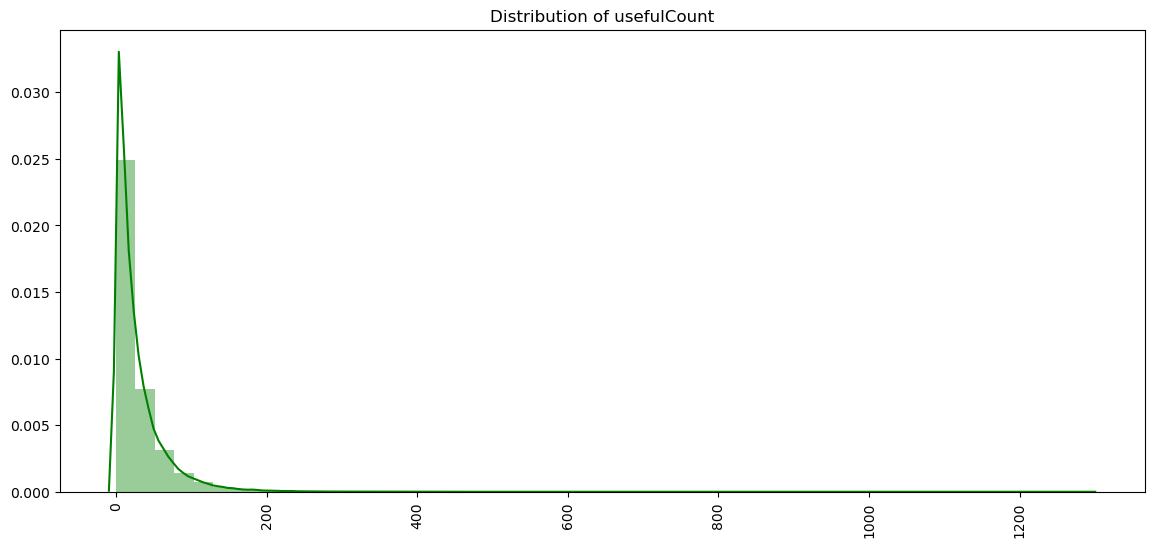

In [20]:
plt.figure(figsize=(14,6))  # Sets up the figure size for the plot.
sns.distplot(df_all["usefulCount"].dropna(), color="green")  # Creates a distribution plot using Seaborn for the 'usefulCount' column.
plt.xticks(rotation='vertical')  # Rotates the x-axis labels vertically for better readability.
plt.xlabel('', fontsize=12)  # Sets an empty x-axis label with a specified font size.
plt.ylabel('', fontsize=12)  # Sets an empty y-axis label with a specified font size.
plt.title("Distribution of usefulCount")  # Adds a title to the plot.
plt.show()  # Displays the plot.


In [21]:
df_all["usefulCount"].describe()


count    215063.000000
mean         28.001004
std          36.346069
min           0.000000
25%           6.000000
50%          16.000000
75%          36.000000
max        1291.000000
Name: usefulCount, dtype: float64

In [22]:
percent = (df_all.isnull().sum()).sort_values(ascending=False)
print(percent)
print("Missing value (%):", 1200/df_all.shape[0] * 100)

condition      1194
uniqueID          0
drugName          0
review            0
rating            0
date              0
usefulCount       0
year              0
month             0
day               0
dtype: int64
Missing value (%): 0.5579760349292998


# Pre-Processing

In [23]:
df_train = df_train.dropna(axis=0)  # Removes any rows in the training dataset that contain NaN values.
df_test = df_test.dropna(axis=0)  # Similarly, removes any rows in the test dataset that contain NaN values.
df_all = pd.concat([df_train,df_test]).reset_index()  # Concatenates the cleaned training and test datasets and resets the index.
del df_all['index']  # Deletes the old index column which is now redundant after resetting the index.
percent = (df_all.isnull().sum()).sort_values(ascending=False)  # Calculates the sum of NaN values per column and sorts them in descending order.
percent


uniqueID       0
drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64

In [24]:
all_list = set(df_all.index)  # Stores all indices of the DataFrame in a set.
span_list = []  # Initializes an empty list to hold indices where the condition contains '</span>'.
for i, j in enumerate(df_all['condition']):  # Enumerates over the 'condition' column, getting both index and value.
    if '</span>' in j:  # Checks if '</span>' is in the condition string.
        span_list.append(i)  # Adds the index to the span_list if '</span>' is found.


In [25]:
new_idx = all_list.difference(set(span_list))  # Computes the difference between all indices and those containing '</span>', effectively filtering out the unwanted indices.
df_all = df_all.iloc[list(new_idx)].reset_index()  # Uses the filtered indices to select rows from df_all and resets the DataFrame index.
del df_all['index']  # Deletes the old 'index' column that was created by reset_index, which is unnecessary and could cause confusion.


In [26]:
df_condition = df_all.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)  # Groups by 'condition', counts unique 'drugName', sorts descending.
df_condition = pd.DataFrame(df_condition).reset_index()  # Converts the Series to a DataFrame and resets the index.
df_condition.tail(20)  # Retrieves the last 20 rows, representing the 20 conditions with the fewest unique drug options.


condition  drugName
816                        Short Stature for Age         1
817                    Meningitis, Meningococcal         1
818                                   Angioedema         1
819  Nausea (phosphorated carbohydrate solution)         1
820                           Myotonia Congenita         1
821                              Sleep Paralysis         1
822                             Muscle Twitching         1
823                         Cluster-Tic Syndrome         1
824                            Mumps Prophylaxis         1
825                             Cogan's Syndrome         1
826                                        Somat         1
827                      Somatoform Pain Disorde         1
828                  Multiple Endocrine Adenomas         1
829                                Mononucleosis         1
830                               Sporotrichosis         1
831              Mixed Connective Tissue Disease         1
832   Steroid Responsive Inflammatory Conditions         1
833                     Microscopic polyangiitis         1
834                                 Corneal Ulce         1
835                             Esophageal Spasm         1

In [27]:
df_condition_1 = df_condition[df_condition['drugName']==1].reset_index()  # Filters conditions with only one unique drug and resets the index.
df_condition_1['condition'][0:10]  # Displays the first 10 conditions from the filtered DataFrame.


0              Wound Cleansing
1            Aggressive Behavi
2     Yellow Fever Prophylaxis
3         Tuberculosis, Active
4           Hyperbilirubinemia
5                Hydrocephalus
6                Hypercalcemia
7         Gestational Diabetes
8            Ectopic Pregnancy
9    unctional Gastric Disorde
Name: condition, dtype: object

In [28]:
all_list = set(df_all.index)  # Creates a set of all indices in df_all.
condition_list = []  # Initializes an empty list to collect indices of rows to be removed.
for i, j in enumerate(df_all['condition']):  # Loops over each entry in the 'condition' column of df_all.
    for c in list(df_condition_1['condition']):  # Loops over each condition in df_condition_1.
        if j == c:  # Checks if the condition matches one of the conditions with only one drug.
            condition_list.append(i)  # Appends the index to condition_list if the condition matches.

new_idx = all_list.difference(set(condition_list))  # Computes the set difference to get indices of rows that should remain.
df_all = df_all.iloc[list(new_idx)].reset_index()  # Selects the rows by the indices in new_idx and resets the DataFrame index.
del df_all['index']  # Deletes the old 'index' column created by reset_index.


In [29]:
from bs4 import BeautifulSoup  # Used for HTML parsing, not directly shown in use here.
import nltk  # Natural Language Toolkit, fundamental library for NLP.
from nltk.corpus import stopwords  # Import stopwords from NLTK to filter out less meaningful words.
from nltk.stem.snowball import SnowballStemmer  # Importing SnowballStemmer for stemming words.

stops = set(stopwords.words('english'))  # Initialize a set of stopwords for English.

from wordcloud import WordCloud, STOPWORDS  # Importing WordCloud and STOPWORDS for visualization.


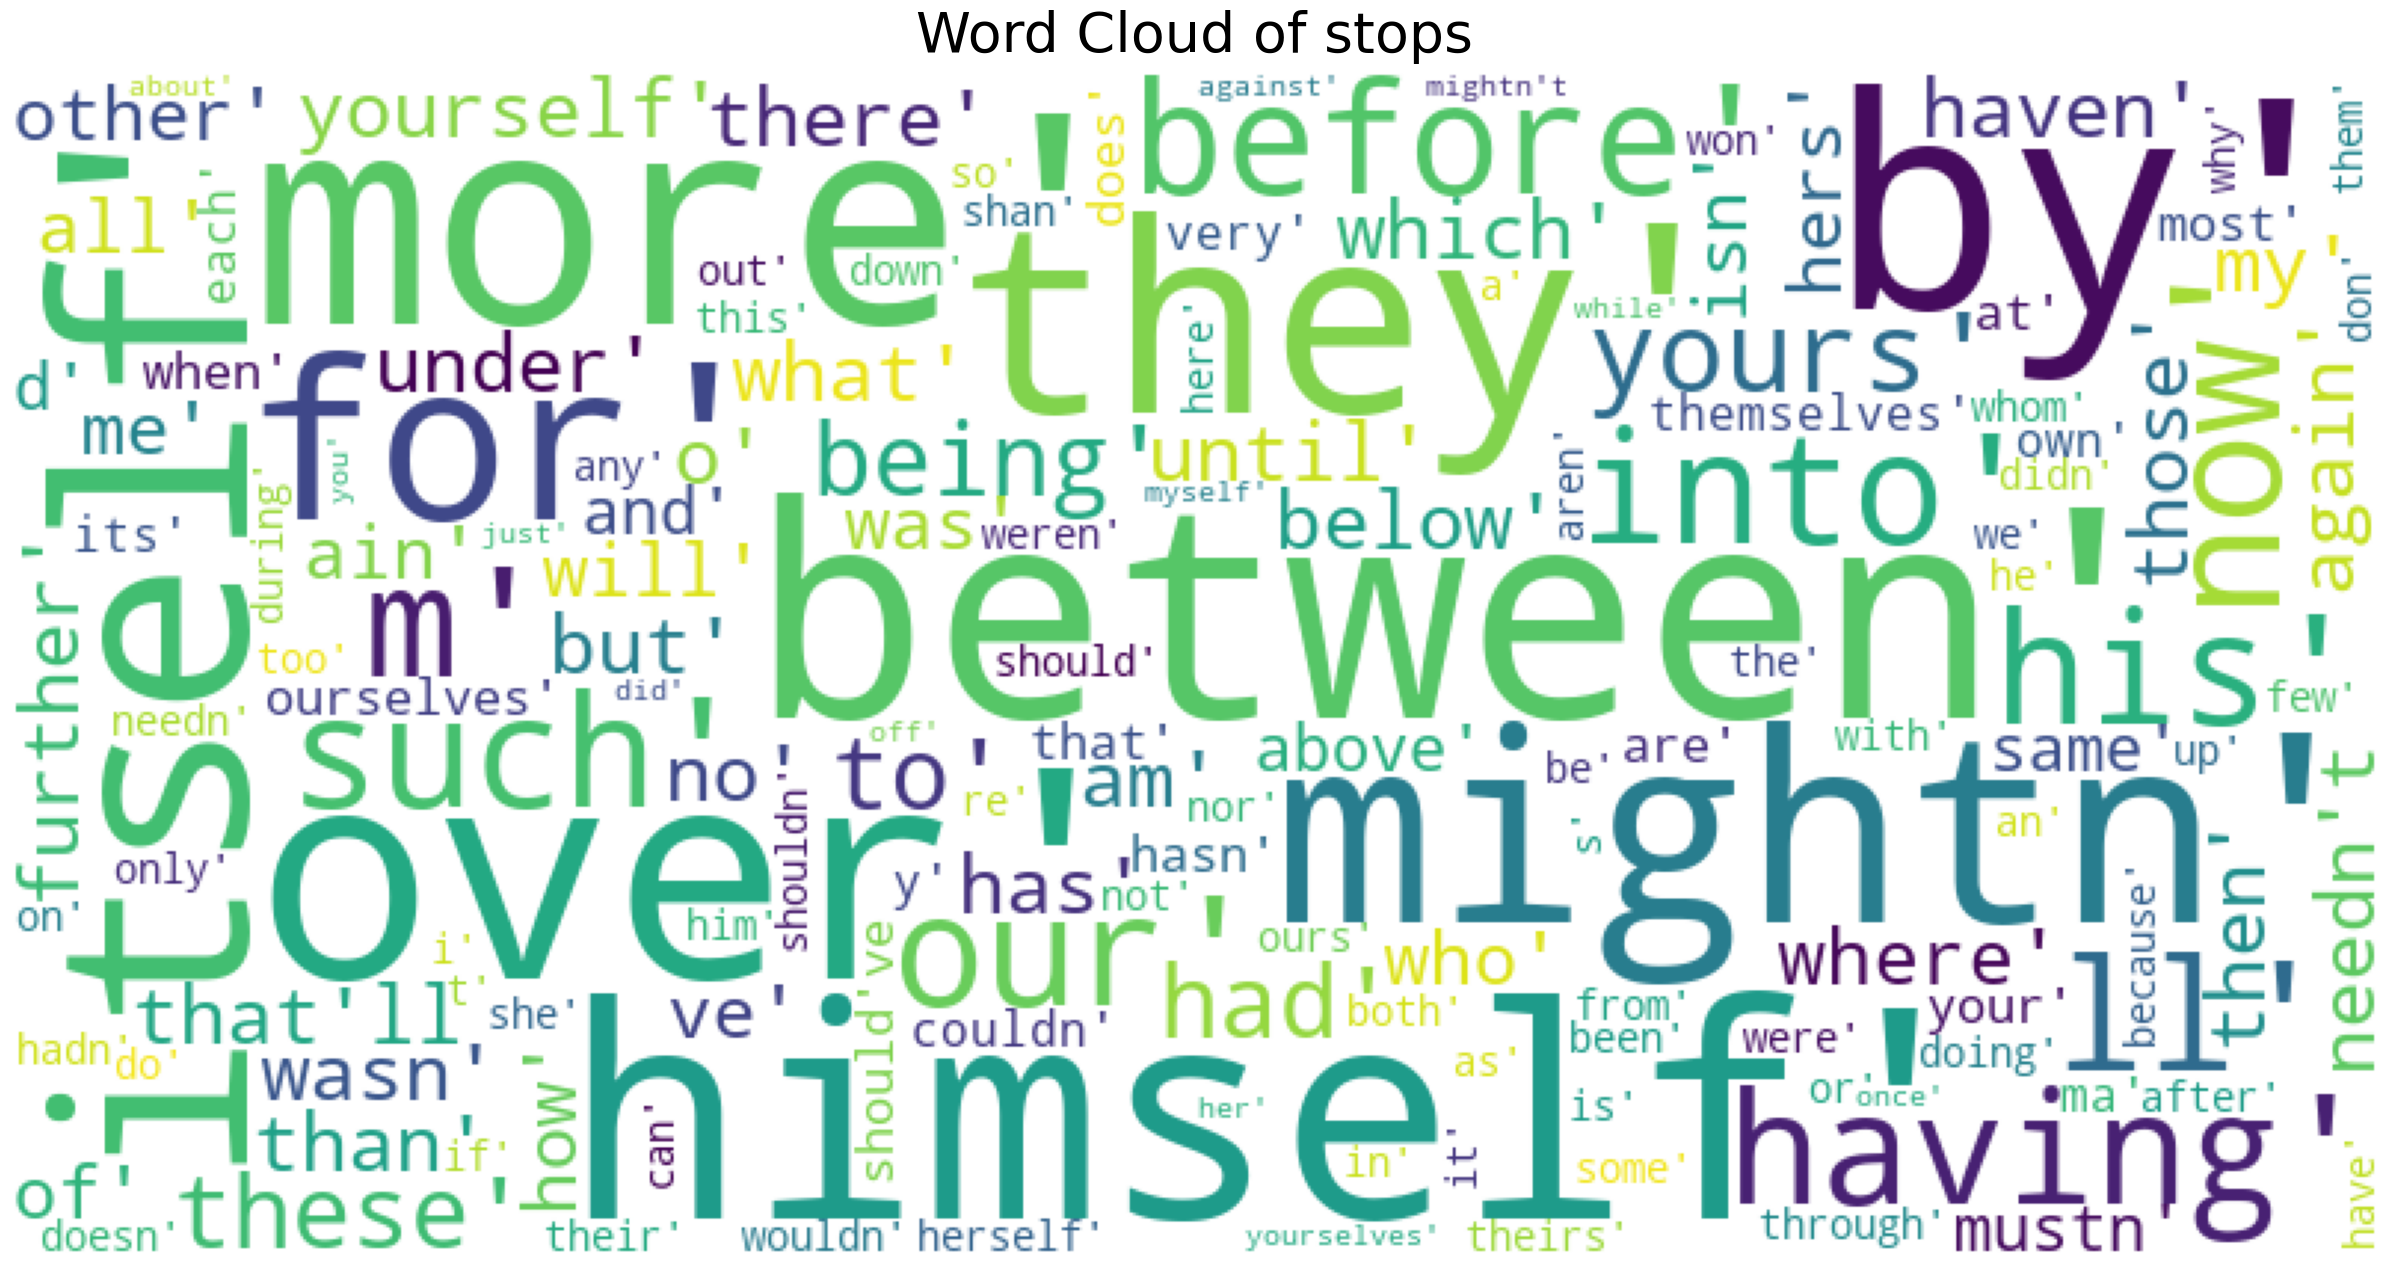

In [30]:
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)  # Additional stopwords from the WordCloud library.
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}  # Custom stopwords specific to this analysis.
    stopwords = stopwords.union(more_stopwords)  # Union of WordCloud's STOPWORDS and custom stopwords.

    wordcloud = WordCloud(background_color='white',
                          stopwords = stopwords,
                          max_words = max_words,
                          max_font_size = max_font_size, 
                          random_state = 42,
                          width=800, 
                          height=400,
                          mask = mask)
    wordcloud.generate(str(text))  # Generates a word cloud from the input text.
    
    plt.figure(figsize=figure_size)  # Sets the size of the figure.
    if image_color:  # If image coloring is enabled.
        image_colors = ImageColorGenerator(mask)
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
        plt.title(title, fontdict={'size': title_size, 'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud)  # Displays the word cloud.
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 'verticalalignment': 'bottom'})
    plt.axis('off')
    plt.tight_layout()
plot_wordcloud(stops, title="Word Cloud of stops")

In [31]:
not_stop = ["aren't","couldn't","didn't","doesn't","don't","hadn't","hasn't","haven't","isn't","mightn't","mustn't","needn't","no","nor","not","shan't","shouldn't","wasn't","weren't","wouldn't"]
for i in not_stop:
    stops.remove(i)


In [32]:
from sklearn import model_selection, preprocessing, metrics, ensemble, naive_bayes, linear_model
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
import lightgbm as lgb

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999
from bs4 import BeautifulSoup
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn import metrics

from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, CuDNNGRU, Conv1D
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers

In [33]:
stemmer = SnowballStemmer('english')

def review_to_words(raw_review):
    # Remove HTML content
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # Remove non-letters
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # Convert to lower case, split into individual words
    words = letters_only.lower().split()
    # Remove stopwords
    meaningful_words = [w for w in words if not w in stops]
    # Apply stemming
    stemming_words = [stemmer.stem(w) for w in meaningful_words]
    # Join the words back into one string separated by space, and return the result
    return(' '.join(stemming_words))


In [34]:
%time df_all['review_clean'] = df_all['review'].apply(review_to_words)

CPU times: user 44.9 s, sys: 30.6 ms, total: 44.9 s
Wall time: 45.2 s


In [35]:
# Label creation based on rating, where ratings above 5 are labeled as positive (1) and others as negative (0)
df_all['sentiment'] = df_all["rating"].apply(lambda x: 1 if x > 5 else 0)

# Split the dataset into training and test sets with 33% of the data reserved for testing
df_train, df_test = train_test_split(df_all, test_size=0.33, random_state=42) 

# Import necessary components for text vectorization and building a pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

# Configure the CountVectorizer to convert text into a numerical format suitable for modeling
vectorizer = CountVectorizer(
    analyzer='word',       # Set the analyzer to 'word' to vectorize at the word level
    tokenizer=None,        # Default tokenizer is used (splits on spaces)
    preprocessor=None,     # No preprocessor used
    stop_words=None,       # No stop words are used
    min_df=2,              # Tokens must appear in at least 2 documents
    ngram_range=(4, 4),    # Use 4-grams (sequences of 4 words)
    max_features=20000     # Limit the number of features to 20,000
)

# Display the configured vectorizer
print(vectorizer)

# Set up a pipeline with the vectorizer as the only step
pipeline = Pipeline([
    ('vect', vectorizer),
])

# Transform the training data and time the operation
%time train_data_features = pipeline.fit_transform(df_train['review_clean'])

# Transform the test data and time the operation
%time test_data_features = pipeline.fit_transform(df_test['review_clean'])


CountVectorizer(max_features=20000, min_df=2, ngram_range=(4, 4))
CPU times: user 9.17 s, sys: 195 ms, total: 9.36 s
Wall time: 9.56 s
CPU times: user 4.9 s, sys: 75.2 ms, total: 4.97 s
Wall time: 5.05 s


# Model Selection

In [36]:
# Import necessary modules from Keras and NumPy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Bidirectional, LSTM, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
import random

# Prepare the target variable for training and testing datasets
y_train = df_train['sentiment']
y_test = df_test['sentiment']
solution = y_test.copy()  # Make a copy of y_test to use later for solution verification or analysis

# Initialize the Sequential model from Keras
model = keras.models.Sequential()

# Add layers to the model
model.add(keras.layers.Dense(200, input_shape=(20000,)))  # First dense layer with 200 units and input dimension
model.add(keras.layers.BatchNormalization())  # Normalize the activations of the previous layer
model.add(keras.layers.Activation('relu'))  # Relu activation function for non-linearity
model.add(keras.layers.Dropout(0.5))  # Dropout for regularization, helps prevent overfitting

model.add(keras.layers.Dense(300))  # Second dense layer with 300 units
model.add(keras.layers.BatchNormalization())  # Batch normalization layer
model.add(keras.layers.Activation('relu'))  # Relu activation function
model.add(keras.layers.Dropout(0.5))  # Dropout layer

model.add(keras.layers.Dense(100, activation='relu'))  # Third dense layer with 100 units, relu activation
model.add(keras.layers.Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

# Compile the model with optimizer, loss function, and evaluation metrics
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               4000200   
                                                                 
 batch_normalization (BatchN  (None, 200)              800       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 200)               0         
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 300)               60300     
                                                                 
 batch_normalization_1 (Batc  (None, 300)              1200      
 hNormalization)                                        

In [37]:
# Convert sparse matrix to dense, models in Keras require dense format
train_data_features_temp = train_data_features.todense()

# Train the model with the specified parameters
hist = model.fit(train_data_features_temp, y_train, epochs=10, batch_size=64)


Epoch 1/10


2024-04-30 15:21:09.916073: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


2220/2220 [==============================] - 16s 7ms/step - loss: 0.5826 - accuracy: 0.7130
Epoch 2/10
2220/2220 [==============================] - 16s 7ms/step - loss: 0.4994 - accuracy: 0.7582
Epoch 3/10
2220/2220 [==============================] - 16s 7ms/step - loss: 0.4625 - accuracy: 0.7753
Epoch 4/10
2220/2220 [==============================] - 16s 7ms/step - loss: 0.4417 - accuracy: 0.7845
Epoch 5/10
2220/2220 [==============================] - 16s 7ms/step - loss: 0.4292 - accuracy: 0.7903
Epoch 6/10
2220/2220 [==============================] - 16s 7ms/step - loss: 0.4201 - accuracy: 0.7936
Epoch 7/10
2220/2220 [==============================] - 16s 7ms/step - loss: 0.4128 - accuracy: 0.7971
Epoch 8/10
2220/2220 [==============================] - 16s 7ms/step - loss: 0.4071 - accuracy: 0.7997
Epoch 9/10
2220/2220 [==============================] - 16s 7ms/step - loss: 0.4012 - accuracy: 0.8021
Epoch 10/10
2220/2220 [==============================] - 16s 7ms/step - loss: 0.3980

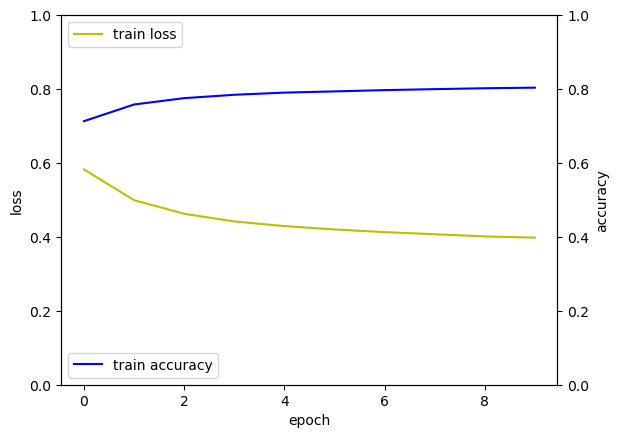

In [38]:
# Enable inline plotting for Jupyter Notebooks
%matplotlib inline
import matplotlib.pyplot as plt

# Create subplot for loss and accuracy
fig, loss_ax = plt.subplots()

# Initialize a secondary y-axis for accuracy
acc_ax = loss_ax.twinx()

# Set y-axis limits for better visualization
loss_ax.set_ylim([0.0, 1.0])
acc_ax.set_ylim([0.0, 1.0])

# Plot training loss and accuracy
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')

# Labeling axes and legend
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

# Position legends
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

# Display the plot
plt.show()

In [39]:
# Convert the sparse matrix of test features to a dense matrix, necessary for model input
test_data_features_temp = test_data_features.todense()

# Evaluate the model on the test dataset to get loss and accuracy
loss_and_metrics = model.evaluate(test_data_features_temp, y_test, batch_size=32)
print('loss_and_metrics : ' + str(loss_and_metrics))  # Print the evaluation results

# Make predictions using the model on the test dataset
sub_preds_deep = model.predict(test_data_features_temp, batch_size=32)

2187/2187 [==============================] - 5s 2ms/step - loss: 1.0759 - accuracy: 0.6438
loss_and_metrics : [1.075877070426941, 0.6438452005386353]
2187/2187 [==============================] - 5s 2ms/step


In [40]:
# Necessary library imports for data manipulation and visualization
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Convert the probabilities to class labels
predicted_labels = np.argmax(sub_preds_deep, axis=1)

# Generate and print the confusion matrix to see true positives, false positives, true negatives, and false negatives
conf_matrix = confusion_matrix(y_test, predicted_labels)
print('Confusion Matrix:\n', conf_matrix)


Confusion Matrix:
 [[21009     0]
 [48969     0]]


In [41]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier, early_stopping

# Define the target variable and the features to be used in the model
target = df_train['sentiment']
feats = ['usefulCount']

# Split the training data into training and validation sets
trn_x, val_x, trn_y, val_y = train_test_split(df_train[feats], target, test_size=0.2, random_state=42)

# Initialize an empty DataFrame to store feature importances
feature_importance_df = pd.DataFrame()

# Configure and initialize the LightGBM classifier
clf = LGBMClassifier(
    n_estimators=2000,  # Number of boosting rounds
    learning_rate=0.05,  # Learning rate for weight adjustments
    num_leaves=30,  # Maximum number of leaves in one tree
    subsample=0.9,  # Subsampling percentage used for training each tree
    max_depth=7,  # Maximum depth of each tree
    reg_alpha=0.1,  # L1 regularization term on weights
    reg_lambda=0.1,  # L2 regularization term on weights
    min_split_gain=0.01,  # Minimum gain to perform a split
    min_child_weight=2,  # Minimum sum of instance weight needed in a child
    silent=True,  # Run in silent mode without logs
    verbose=-1  # Suppress internal LightGBM messages
)

# Train the classifier with early stopping
clf.fit(
    trn_x, trn_y,
    eval_set=[(trn_x, trn_y), (val_x, val_y)],  # Training and validation sets for evaluation
    callbacks=[early_stopping(stopping_rounds=100, verbose=True)]  # Early stopping after 100 rounds without improvement
)

# Use the trained classifier to make predictions on the test set
sub_preds = clf.predict(df_test[feats])

# Collect feature importances from the model
fold_importance_df = pd.DataFrame()
fold_importance_df["feature"] = feats
fold_importance_df["importance"] = clf.feature_importances_
feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[100]	training's binary_logloss: 0.570406	valid_1's binary_logloss: 0.572235


In [42]:
from sklearn.metrics import confusion_matrix

# Define the actual sentiments in the test dataset
solution = df_test['sentiment']

# Calculate the confusion matrix to evaluate the model's predictions
conf_matrix = confusion_matrix(y_pred=sub_preds, y_true=solution)
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[    0 21009]
 [    0 48969]]


In [43]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

# Calculate precision, recall, and F1-score
accuracy = accuracy_score(y_true=solution, y_pred=sub_preds)  # Use 'binary' for binary classification
recall = recall_score(y_true=solution, y_pred=sub_preds, average='binary')  # Use 'binary' for binary classification
f1 = f1_score(y_true=solution, y_pred=sub_preds, average='binary')  # Use 'binary' for binary classification

# Print the results
print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.6997770727943068
Recall: 1.0
F1 Score: 0.8233751166485914


In [44]:
# Record the length of the training dataset
len_train = df_train.shape[0]

# Concatenate the training and testing dataframes
df_all = pd.concat([df_train, df_test])

# Delete the original training and testing dataframes to free up memory
del df_train, df_test

# Run garbage collection to reclaim memory from deleted dataframes
collected = gc.collect()
print(f"Garbage collector: collected {collected} objects.")  # Optional: print how many objects were collected


Garbage collector: collected 6625 objects.


In [45]:
# Convert the 'date' column to datetime format to facilitate date-related operations
df_all['date'] = pd.to_datetime(df_all['date'])

# Extract the day from the 'date' column and create a new column 'day'
df_all['day'] = df_all['date'].dt.day

# Extract the year from the 'date' column and create a new column 'year'
df_all['year'] = df_all['date'].dt.year

# Extract the month from the 'date' column and create a new column 'month'
df_all['month'] = df_all['date'].dt.month

In [46]:
from textblob import TextBlob  # Import TextBlob for sentiment analysis
from tqdm import tqdm  # Import tqdm for progress bar support during loops

# Extract the cleaned reviews from the dataframe
reviews = df_all['review_clean']

# Initialize an empty list to store computed sentiment values
Predict_Sentiment = []

# Iterate over each review in the dataset
for review in tqdm(reviews):
    blob = TextBlob(review)  # Create a TextBlob object for the review
    Predict_Sentiment += [blob.sentiment.polarity]  # Append the polarity score to the list

# Add the sentiment scores as a new column in the dataframe
df_all["Predict_Sentiment"] = Predict_Sentiment

# Display the first few rows of the dataframe to verify the new column
df_all.head()

100%|██████████| 212053/212053 [00:18<00:00, 11390.39it/s]


uniqueID      drugName                    condition  \
130185     66913      Seroquel  Generalized Anxiety Disorde   
155501    222222   Fluconazole       Onychomycosis, Toenail   
75325      75807     Temazepam                     Insomnia   
19174     229747      Ketamine                         Pain   
209735    102495  Aripiprazole     Major Depressive Disorde   

                                                   review  rating       date  \
130185  "After trying nearly every SSRI on the market ...       9 2010-11-26   
155501  "This takes 6+ months, but did clear up a deca...       9 2008-05-03   
75325   "Worked for awhile pretty well but then went b...       2 2016-04-21   
19174   "I was given this after surgery for pain as I ...       1 2016-04-16   
209735  "Abilify served me well over a two month perio...       9 2016-12-16   

        usefulCount                                       review_clean  \
130185          102  tri near everi ssri market place pristiq impro...   
155501           39                 take month clear decad long infect   
75325            15  work awhil pretti well went back mayb get hour...   
19174            19  given surgeri pain morphin tri drug sort omg w...   
209735            5  abilifi serv well two month period antidepress...   

        sentiment  day  year  month  Predict_Sentiment  
130185          1   26  2010     11           0.023958  
155501          1    3  2008      5           0.025000  
75325           0   21  2016      4          -0.125000  
19174           0   16  2016      4           0.166667  
209735          1   16  2016     12           0.038889

In [47]:
# Calculate the correlation coefficient between the predicted sentiment from reviews and the numerical ratings
rating_corr = np.corrcoef(df_all["Predict_Sentiment"], df_all["rating"])
print("Correlation between Predicted Sentiment and Ratings:", rating_corr)

# Calculate the correlation coefficient between the predicted sentiment from reviews and the binary sentiment
sentiment_corr = np.corrcoef(df_all["Predict_Sentiment"], df_all["sentiment"])
print("Correlation between Predicted Sentiment and Binary Sentiment:", sentiment_corr)

Correlation between Predicted Sentiment and Ratings: [[1.         0.25709864]
 [0.25709864 1.        ]]
Correlation between Predicted Sentiment and Binary Sentiment: [[1.         0.23518272]
 [0.23518272 1.        ]]


In [48]:
# Retrieve the 'review' column from df_all which contains the text to be analyzed
reviews = df_all['review']

# Initialize an empty list to store sentiment scores
Predict_Sentiment = []

# Loop through each review in the DataFrame
for review in tqdm(reviews):
    blob = TextBlob(review)  # Create a TextBlob object for the review
    # Append the polarity score of the review to the Predict_Sentiment list
    Predict_Sentiment += [blob.sentiment.polarity]

# Add the computed sentiment scores as a new column 'Predict_Sentiment2' in df_all
df_all["Predict_Sentiment2"] = Predict_Sentiment

# Display the first few rows of df_all to verify the new column
df_all.head()


100%|██████████| 212053/212053 [00:39<00:00, 5425.42it/s]


uniqueID      drugName                    condition  \
130185     66913      Seroquel  Generalized Anxiety Disorde   
155501    222222   Fluconazole       Onychomycosis, Toenail   
75325      75807     Temazepam                     Insomnia   
19174     229747      Ketamine                         Pain   
209735    102495  Aripiprazole     Major Depressive Disorde   

                                                   review  rating       date  \
130185  "After trying nearly every SSRI on the market ...       9 2010-11-26   
155501  "This takes 6+ months, but did clear up a deca...       9 2008-05-03   
75325   "Worked for awhile pretty well but then went b...       2 2016-04-21   
19174   "I was given this after surgery for pain as I ...       1 2016-04-16   
209735  "Abilify served me well over a two month perio...       9 2016-12-16   

        usefulCount                                       review_clean  \
130185          102  tri near everi ssri market place pristiq impro...   
155501           39                 take month clear decad long infect   
75325            15  work awhil pretti well went back mayb get hour...   
19174            19  given surgeri pain morphin tri drug sort omg w...   
209735            5  abilifi serv well two month period antidepress...   

        sentiment  day  year  month  Predict_Sentiment  Predict_Sentiment2  
130185          1   26  2010     11           0.023958            0.093750  
155501          1    3  2008      5           0.025000            0.025000  
75325           0   21  2016      4          -0.125000           -0.116667  
19174           0   16  2016      4           0.166667           -0.089286  
209735          1   16  2016     12           0.038889           -0.029167

In [49]:
# Calculate the correlation coefficient between the computed sentiment scores and numerical ratings
correlation_rating = np.corrcoef(df_all["Predict_Sentiment2"], df_all["rating"])
print("Correlation between TextBlob Sentiment and Numerical Ratings:", correlation_rating)

# Calculate the correlation coefficient between the computed sentiment scores and binary sentiment labels
correlation_sentiment = np.corrcoef(df_all["Predict_Sentiment2"], df_all["sentiment"])
print("Correlation between TextBlob Sentiment and Binary Sentiment:", correlation_sentiment)

Correlation between TextBlob Sentiment and Numerical Ratings: [[1.         0.34831213]
 [0.34831213 1.        ]]
Correlation between TextBlob Sentiment and Binary Sentiment: [[1.         0.31714515]
 [0.31714515 1.        ]]


In [50]:
# Count the number of sentences in each review based on occurrences of newline characters
df_all['count_sent'] = df_all["review"].apply(lambda x: len(re.findall("\n", str(x))) + 1)

# Count the number of words in each cleaned review
df_all['count_word'] = df_all["review_clean"].apply(lambda x: len(str(x).split()))

# Count the number of unique words in each cleaned review
df_all['count_unique_word'] = df_all["review_clean"].apply(lambda x: len(set(str(x).split())))

# Count the total number of letters in each cleaned review
df_all['count_letters'] = df_all["review_clean"].apply(lambda x: len(str(x)))

# Count the number of punctuation marks in each review
df_all["count_punctuations"] = df_all["review"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

# Count the number of words that are entirely in uppercase in each review
df_all["count_words_upper"] = df_all["review"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

# Count the number of words that start with an uppercase letter in each review
df_all["count_words_title"] = df_all["review"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

# Count the number of stopwords in each review
df_all["count_stopwords"] = df_all["review"].apply(lambda x: len([w for w in str(x).lower().split() if w in stops]))

# Calculate the average length of words in each cleaned review
df_all["mean_word_len"] = df_all["review_clean"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_curve, average_precision_score
from lightgbm import LGBMClassifier, early_stopping

# Determine the season from the month
df_all['season'] = df_all["month"].apply(lambda x: 1 if ((x > 2) & (x < 6)) else (2 if (x > 5) & (x < 9) else (3 if (x > 8) & (x < 12) else 4)))

# Split the combined dataset back into training and test sets using recorded length
df_train = df_all[:len_train]
df_test = df_all[len_train:]

# Define the target variable for the model
target = df_train['sentiment']

# Define the feature set to be used in the model
feats = [
    'usefulCount', 'day', 'year', 'month', 'Predict_Sentiment', 'Predict_Sentiment2', 
    'count_sent', 'count_word', 'count_unique_word', 'count_letters', 
    'count_punctuations', 'count_words_upper', 'count_words_title', 
    'count_stopwords', 'mean_word_len', 'season'
]

# Split the training data into a training and validation set for the LightGBM model
trn_x, val_x, trn_y, val_y = train_test_split(df_train[feats], target, test_size=0.2, random_state=42)

# Initialize a DataFrame to collect feature importances
feature_importance_df = pd.DataFrame()

# Initialize and configure the LightGBM classifier
clf = LGBMClassifier(
    n_estimators=10000,  # Number of boosting rounds
    learning_rate=0.10,  # Learning rate for boosting
    num_leaves=30,  # Maximum number of leaves in one tree
    subsample=0.9,  # Subsampling fraction for each tree
    max_depth=7,  # Maximum depth of each tree
    reg_alpha=0.1,  # L1 regularization
    reg_lambda=0.1,  # L2 regularization
    min_split_gain=0.01,  # Minimum gain required to split a node
    min_child_weight=2,  # Minimum child weight required for a node
    silent=-1,  # Silence LightGBM output
    verbose=-1  # Verbosity of LightGBM logs
)

# Train the classifier with early stopping for model regularization
clf.fit(
    trn_x, trn_y,
    eval_set=[(trn_x, trn_y), (val_x, val_y)],  # Use training and validation sets for evaluation
    callbacks=[early_stopping(stopping_rounds=100, verbose=True)]  # Early stopping to prevent overfitting
)

# Make predictions on the test set
sub_preds = clf.predict(df_test[feats])

# Collect feature importances from the trained model
fold_importance_df = pd.DataFrame()
fold_importance_df["feature"] = feats
fold_importance_df["importance"] = clf.feature_importances_
feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)  # Concatenate to maintain feature importances


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[6768]	training's binary_logloss: 0.0998956	valid_1's binary_logloss: 0.396511


Confusion Matrix:
 [[13767  7242]
 [ 3628 45341]]
Accuracy: 0.8446654662894052


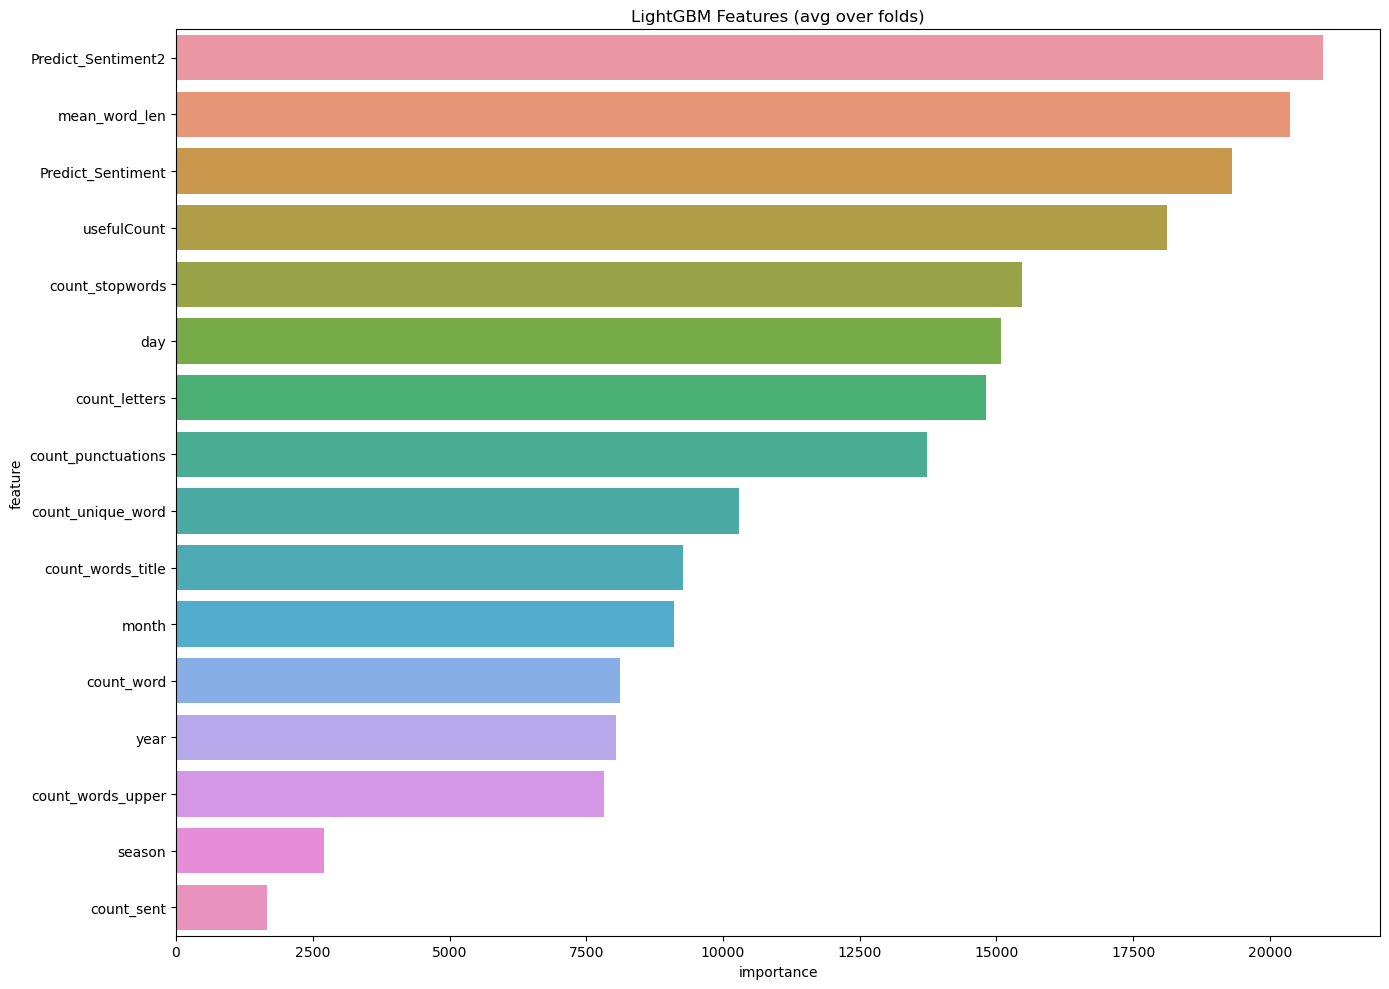

In [52]:
# Calculate the confusion matrix to evaluate the model
solution = df_test['sentiment']  # Ensure 'solution' variable contains the true labels
conf_matrix = confusion_matrix(y_pred=sub_preds, y_true=solution)
accuracy = accuracy_score(y_pred=sub_preds, y_true=solution)
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:",accuracy)

# Aggregate feature importances across folds, taking the mean of importances for each feature
cols = feature_importance_df[["feature", "importance"]].groupby("feature").mean().sort_values(
    by="importance", ascending=False)[:50].index

# Filter the feature importance DataFrame to include only the top 50 features
best_features = feature_importance_df.loc[feature_importance_df.feature.isin(cols)]

# Plotting setup for the feature importances
plt.figure(figsize=(14,10))
sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.savefig('lgbm_importances.png')  # Save the plot as a PNG file

# Model Prediction

In [53]:
# Import the Harvard emotional dictionary from a CSV file
word_table = pd.read_csv("inquirerbasic.csv.xls")

# Display the first few rows of the dictionary to verify its content and structure
word_table.head()

Entry Source Positiv  Negativ
0            A  H4Lvd     NaN      NaN
1      ABANDON  H4Lvd     NaN  Negativ
2  ABANDONMENT     H4     NaN  Negativ
3        ABATE  H4Lvd     NaN  Negativ
4    ABATEMENT    Lvd     NaN      NaN

In [54]:
# Create a list of positive words from the Harvard emotional dictionary
temp_Positiv = []
Positiv_word_list = []
for i in range(0, len(word_table.Positiv)):
    if word_table.iloc[i,2] == "Positiv":
        temp = word_table.iloc[i,0].lower()  # Convert word to lowercase
        temp1 = re.sub('\d+', '', temp)  # Remove digits
        temp2 = re.sub('#', '', temp1)  # Remove hashtag symbols
        temp_Positiv.append(temp2)

Positiv_word_list = list(set(temp_Positiv))  # Remove duplicates
len(temp_Positiv)
len(Positiv_word_list)  # Output the length of the list to check how many unique words are there

# Create a list of negative words from the Harvard emotional dictionary
temp_Negativ = []
Negativ_word_list = []
for i in range(0, len(word_table.Negativ)):
    if word_table.iloc[i,3] == "Negativ":
        temp = word_table.iloc[i,0].lower()  # Convert word to lowercase
        temp1 = re.sub('\d+', '', temp)  # Remove digits
        temp2 = re.sub('#', '', temp1)  # Remove hashtag symbols
        temp_Negativ.append(temp2)

Negativ_word_list = list(set(temp_Negativ))  # Remove duplicates
len(temp_Negativ)
len(Negativ_word_list)  # Output the length of the list to check how many unique words are there

2006

In [55]:
from sklearn.feature_extraction.text import CountVectorizer

# Counting positive words
vectorizer = CountVectorizer(vocabulary=Positiv_word_list)  # Initialize vectorizer with the positive word list
content = df_test['review_clean']  # Extract the text content from the test dataset
X = vectorizer.fit_transform(content)  # Fit and transform the content to count occurrences of positive words
f = X.toarray()  # Convert the sparse matrix to a dense matrix
f = pd.DataFrame(f)  # Convert array to DataFrame for easier manipulation
f.columns = Positiv_word_list  # Name the columns after the positive words
df_test["num_Positiv_word"] = f.sum(axis=1)  # Sum across rows to count the total number of positive words per review

# Counting negative words
vectorizer2 = CountVectorizer(vocabulary=Negativ_word_list)  # Initialize vectorizer with the negative word list
content = df_test['review_clean']  # Reuse the text content from the test dataset
X2 = vectorizer2.fit_transform(content)  # Fit and transform the content to count occurrences of negative words
f2 = X2.toarray()  # Convert the sparse matrix to a dense matrix
f2 = pd.DataFrame(f2)  # Convert array to DataFrame for easier manipulation
f2.columns = Negativ_word_list  # Name the columns after the negative words
df_test["num_Negativ_word"] = f2.sum(axis=1)  # Sum across rows to count the total number of negative words per review


In [56]:
# Calculate the ratio of positive words to total sentiment words
df_test["Positiv_ratio"] = df_test["num_Positiv_word"] / (df_test["num_Positiv_word"] + df_test["num_Negativ_word"])

# Decide sentiment based on the positivity ratio
df_test["sentiment_by_dic"] = df_test["Positiv_ratio"].apply(lambda x: 1 if x >= 0.5 else 0)

# Display the first few rows of the dataframe to verify the new columns
df_test.head()

uniqueID                          drugName  \
147354    126702                       Brimonidine   
195249     84765  Ethinyl estradiol / norgestimate   
86265      71559                           Vraylar   
44172     132320                            Ativan   
90569     177278                        Duloxetine   

                          condition  \
147354                      Rosacea   
195249                Birth Control   
86265               Bipolar Disorde   
44172                       Anxiety   
90569   Generalized Anxiety Disorde   

                                                   review  rating       date  \
147354  "Never , never , never use this cream !!!!!! I...       1 2015-08-31   
195249  "I was switched to this after about 9 months o...      10 2016-05-01   
86265   "I began at 1.5 then titrated to 3mg dosage. A...       3 2016-08-17   
44172   "Ativan 0.5mg calms me down considerably withi...       5 2012-01-12   
90569   "My thoughts on Cymbalta: Cymbalta has left me...       1 2017-05-03   

        usefulCount                                       review_clean  \
147354           17  never never never use cream help way angri dis...   
195249            3  switch month mononessa ask switch happen anywa...   
86265            17  began titrat mg dosag first love medicin compl...   
44172            26  ativan mg calm consider within minut side effe...   
90569            29  thought cymbalta cymbalta left fog no feel non...   

        sentiment  day  year  month  Predict_Sentiment  Predict_Sentiment2  \
147354          0   31  2015      8           0.116667           -0.157955   
195249          1    1  2016      5          -0.257407           -0.210916   
86265           0   17  2016      8           0.041667            0.139815   
44172           0   12  2012      1          -0.170530           -0.061481   
90569           0    3  2017      5           0.071429           -0.122253   

        count_sent  count_word  count_unique_word  count_letters  \
147354           1          58                 41            335   
195249           1          50                 42            314   
86265            1          41                 38            251   
44172            1          62                 54            353   
90569            2          68                 61            395   

        count_punctuations  count_words_upper  count_words_title  \
147354                  58                  5                 11   
195249                  27                  6                 14   
86265                   20                  6                  9   
44172                   27                  7                  8   
90569                   38                 12                 19   

        count_stopwords  mean_word_len  season  num_Positiv_word  \
147354               54       4.793103       2               NaN   
195249               50       5.300000       1               NaN   
86265                41       5.146341       2               NaN   
44172                55       4.709677       4               0.0   
90569                65       4.823529       1               NaN   

        num_Negativ_word  Positiv_ratio  sentiment_by_dic  
147354               NaN            NaN                 0  
195249               NaN            NaN                 0  
86265                NaN            NaN                 0  
44172                4.0            0.0                 0  
90569                NaN            NaN                 0

In [57]:
def userful_count(data):
    # Group the data by 'condition' and count the number of occurrences for each condition
    grouped = data.groupby(['condition']).size().reset_index(name='user_size')
    
    # Merge the count back into the original dataframe on the 'condition' column
    data = pd.merge(data, grouped, on='condition', how='left')
    
    return data

# Apply the function to the test dataset
df_test = userful_count(df_test)

# Normalize the 'usefulCount' by the number of users reporting the same condition
df_test['usefulCount'] = df_test['usefulCount'] / df_test['user_size']

In [58]:
# Assign deep learning model predictions to the test dataset
df_test['deep_pred'] = sub_preds_deep

# Assign machine learning model predictions to the test dataset
df_test['machine_pred'] = sub_preds

# Calculate a weighted total prediction by summing the predictions from the deep learning model,
# the machine learning model, and the dictionary-based sentiment analysis
df_test['total_pred'] = (df_test['deep_pred'] + df_test['machine_pred'] + df_test['sentiment_by_dic']) * df_test['usefulCount']


In [59]:
# Group the df_test DataFrame by 'condition' and 'drugName' and compute the mean of 'total_pred' for each group
df_test = df_test.groupby(['condition', 'drugName']).agg({'total_pred': ['mean']})

# Display the modified DataFrame
df_test

total_pred
                                                       mean
condition                drugName                          
ADHD                     Adderall                  0.061510
                         Adderall XR               0.036628
                         Adzenys XR-ODT            0.009705
                         Amantadine                0.008977
                         Amphetamine               0.011564
...                                                     ...
moterol)                 Arformoterol              1.571500
                         Budesonide / formoterol   1.736298
von Willebrand's Disease Stimate                   7.273099
zen Shoulde              Nabumetone               20.360011
                         Naproxen                  1.113146

[5773 rows x 1 columns]